<IPython.core.display.Javascript object>


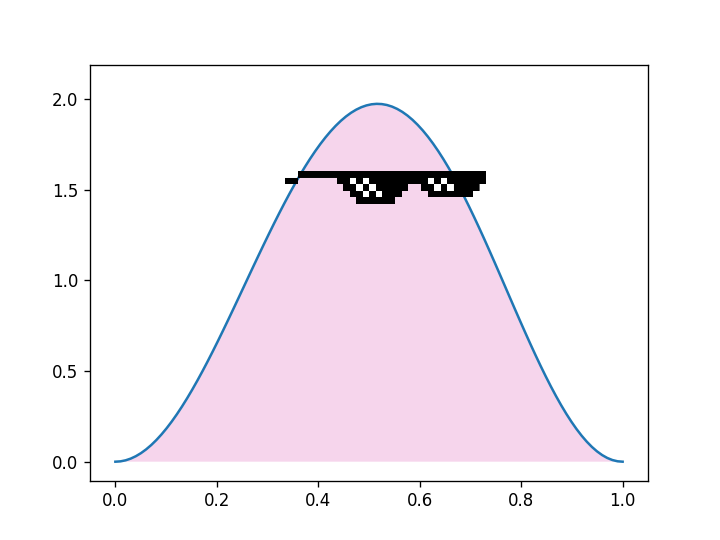

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib notebook

PI = np.pi
a = 1 # Width of the well
h = 2 # Height of the figure
xdiv = 100
X = np.linspace(0,a,xdiv)
tdiv = 100
T = np.linspace(0,2.7*PI,tdiv)

# ========================================= BASIC LAYOUT & PLOT
# ψn(x) = (√2/a) sin(nπx/a)
# φn(t) = exp(iEnt/ħ), where En ∝ n^2
# Y(x,t) = c1ψ1(x)φ1(t) + c2ψ2(x)φ2(t), where c = <8,1> normalized

def Y(x,t): 
    xfunc = lambda n,x: np.sqrt(2/a) * np.sin(n*PI*x/a)
    tfunc = lambda n,t: np.exp(1j*n*n*t)
    coef = np.array([8,1])
    coef = coef / np.sqrt(coef.dot(coef))
    
    Psi = coef[0]*xfunc(1,x)*tfunc(1,t) + coef[1]*xfunc(2,x)*tfunc(2,t)
    return np.absolute(Psi)**2

fig = plt.figure(figsize=(6,4.5))
ax = fig.subplots(1)
line, = ax.plot(X,Y(X,0))
fill = ax.fill_between(*line.get_data(), alpha=0.3)

# ========================================= SUNGLASSES
xy = (0.5, 1.0)

imgboxR = OffsetImage(mpimg.imread('glass_right.png'), zoom=0.05)
abR = AnnotationBbox(imgboxR, xy, frameon=False)

imgboxL = OffsetImage(mpimg.imread('glass_left.png'), zoom=0.05)
abL = AnnotationBbox(imgboxL, xy, frameon=False)

ax.add_artist(abR)

# ========================================= ANIMATE
palette = ['tab:blue', 'tab:pink', 'tab:green', 'tab:purple']

def part(t): # In what period is it now?
    part = int(4*t/max(T))
    if part == 4: part =- 1
    return part

def run(t):
    global fill, ab
    p = part(t)
    
    line.set_ydata(Y(X,t))
    fill.remove()
    fill = ax.fill_between(*line.get_data(), fc=palette[p], alpha=0.3)
    if p < 2:
        if not abR in ax.get_children():
            abL.remove()
            ax.add_artist(abR)    
        abR.xybox = (0.5-0.09*np.cos((PI*0.94)*t), 1.6-0.1*(np.sin((PI*0.94)*t))**2)
    else:
        if not abL in ax.get_children():
            abR.remove()
            ax.add_artist(abL)    
        abL.xybox = (0.5-0.09*np.cos((PI*0.94)*t), 1.6-0.1*(np.sin((PI*0.94)*t))**2)
    return line, fill

Interval = 30
ani = animation.FuncAnimation(fig, run, T, interval=Interval, blit=True, repeat=True)

# If you wish to save as GIF in current directory
'''
import pathlib
f = pathlib.Path.cwd() / 'FunkyPsi.gif'
writergif = animation.PillowWriter(fps=30) 
ani.save(f, writer=writergif)
'''

plt.show()